In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv


# Loading Libraries

In [2]:
import pandas as pd
import csv
import re 
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
train = pd.read_csv("/kaggle/input/nlp-getting-started/train.csv")
test = pd.read_csv("/kaggle/input/nlp-getting-started/test.csv")

In [4]:
train.columns

Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')

In [5]:
train['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [6]:
train.shape, test.shape

((7613, 5), (3263, 4))

In [7]:
train0=train[train['target']==0]
train1=train[train['target']==1]

In [8]:
train0.shape, train1.shape

((4342, 5), (3271, 5))

# Pre-processing Data

In [9]:
#Remove Hashtags
train['text'].replace( { r"#(\w+)" : '' }, inplace= True, regex = True)

#Remove Mention
train['text'].replace( { r"@(\w+)" : '' }, inplace= True, regex = True)

#Remove URL
train['text'].astype(str).replace( { r"http\S+" : '' }, inplace= True, regex = True)

train['text']=train['text'].str.lower()

In [10]:
#Remove Hashtags
test['text'].replace( { r"#(\w+)" : '' }, inplace= True, regex = True)

#Remove Mention
test['text'].replace( { r"@(\w+)" : '' }, inplace= True, regex = True)

#Remove URL
test['text'].astype(str).replace( { r"http\S+" : '' }, inplace= True, regex = True)

test['text']=test['text'].str.lower()

In [11]:
# Import stopwords with nltk.
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [12]:
train['text'] = train['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

test['text'] = test['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [13]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,deeds reason may allah forgive us,1
1,4,NaN,NaN,forest fire near la ronge sask. canada,1
2,5,NaN,NaN,residents asked 'shelter place' notified offic...,1
3,6,NaN,NaN,"13,000 people receive evacuation orders califo...",1
4,7,NaN,NaN,got sent photo ruby smoke pours school,1


In [14]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,happened terrible car crash
1,2,NaN,NaN,"heard different cities, stay safe everyone."
2,3,NaN,NaN,"forest fire spot pond, geese fleeing across st..."
3,9,NaN,NaN,apocalypse lighting.
4,11,NaN,NaN,typhoon soudelor kills 28 china taiwan


In [15]:
y = train['target']
x = train['text']

In [16]:
x.shape

(7613,)

# Vectorization

## TF-IDF

In [17]:
# Creating a word corpus for vectorization
corpus = []
for i in range(x.shape[0]):
    corpus.append(x.iloc[i])

In [18]:
vectorizer1 = TfidfVectorizer(max_features=1000)
X1 = vectorizer1.fit_transform(x)
feature_names1 = vectorizer1.get_feature_names()
denselist1 = X1.todense().tolist()
train = pd.DataFrame(denselist1, columns=feature_names1)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [19]:
# splitting the training and testing part from the data
X_temp, X_test, y_temp, y_test = train_test_split(train, y, test_size=0.2, random_state=0)

## Testing with Models

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
import seaborn as sns

In [21]:
accuracy = {'TF-IDF':[]}

### Logistic Regression

In [22]:
#TF-IDF
regressor_LR_tf = LogisticRegression(C=1.0,penalty='l2',solver='newton-cg')
regressor_LR_tf.fit(X_temp, y_temp)
y_predict_LR_tf = regressor_LR_tf.predict(X_test)
a=(regressor_LR_tf.score(X_test, y_test))
accuracy['TF-IDF'].append(a)

print(metrics.confusion_matrix(y_test, y_predict_LR_tf))
print(metrics.classification_report(y_test, y_predict_LR_tf))
print(metrics.accuracy_score(y_test, y_predict_LR_tf))

[[774 112]
 [221 416]]
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       886
           1       0.79      0.65      0.71       637

    accuracy                           0.78      1523
   macro avg       0.78      0.76      0.77      1523
weighted avg       0.78      0.78      0.78      1523

0.7813525935653316


### Decision Tree

In [23]:
#TF-IDF
model_DT_tf = DecisionTreeClassifier(criterion = 'gini', max_depth=2) 
model_DT_tf.fit(X_temp, y_temp)
y_predict_DT_tf = model_DT_tf.predict(X_test)
a=(model_DT_tf.score(X_test,y_test))
accuracy['TF-IDF'].append(a)

print(metrics.confusion_matrix(y_test, y_predict_DT_tf))
print(metrics.classification_report(y_test, y_predict_DT_tf))
print(metrics.accuracy_score(y_test, y_predict_DT_tf))

[[825  61]
 [483 154]]
              precision    recall  f1-score   support

           0       0.63      0.93      0.75       886
           1       0.72      0.24      0.36       637

    accuracy                           0.64      1523
   macro avg       0.67      0.59      0.56      1523
weighted avg       0.67      0.64      0.59      1523

0.6428102429415627


### Gradient Boosting

In [24]:
#TF-IDF
model_GB_tf = GradientBoostingClassifier(learning_rate= 0.1, max_depth=3, n_estimators= 100,subsample=1.0) 
model_GB_tf.fit(X_temp, y_temp)
y_predict_GB_tf = model_GB_tf.predict(X_test)
a=(model_GB_tf.score(X_test,y_test))
accuracy['TF-IDF'].append(a)
print(metrics.confusion_matrix(y_test, y_predict_GB_tf))
print(metrics.classification_report(y_test, y_predict_GB_tf))
print(metrics.accuracy_score(y_test, y_predict_GB_tf))

[[772 114]
 [299 338]]
              precision    recall  f1-score   support

           0       0.72      0.87      0.79       886
           1       0.75      0.53      0.62       637

    accuracy                           0.73      1523
   macro avg       0.73      0.70      0.70      1523
weighted avg       0.73      0.73      0.72      1523

0.7288246881155613


### Random Forest

In [25]:
#TF-IDF
model_RF_tf = RandomForestClassifier(n_estimators= 100, max_features = 'log2')
model_RF_tf.fit(X_temp, y_temp)
y_predict_RF_tf = model_RF_tf.predict(X_test)
a=(model_RF_tf.score(X_test,y_test))
accuracy['TF-IDF'].append(a)

print(metrics.confusion_matrix(y_test, y_predict_RF_tf))
print(metrics.classification_report(y_test, y_predict_RF_tf))
print(metrics.accuracy_score(y_test, y_predict_RF_tf))

[[774 112]
 [234 403]]
              precision    recall  f1-score   support

           0       0.77      0.87      0.82       886
           1       0.78      0.63      0.70       637

    accuracy                           0.77      1523
   macro avg       0.78      0.75      0.76      1523
weighted avg       0.77      0.77      0.77      1523

0.7728168089297439


### K Nearest Neighbours

In [26]:
#TF-IDF
model_KN_tf = KNeighborsClassifier(metric= 'manhattan', n_neighbors= 5, weights= 'distance') 
model_KN_tf.fit(X_temp, y_temp)
y_predict_KN_tf = model_KN_tf.predict(X_test)
a=(model_KN_tf.score(X_test,y_test))
accuracy['TF-IDF'].append(a)
print(metrics.confusion_matrix(y_test, y_predict_KN_tf))
print(metrics.classification_report(y_test, y_predict_KN_tf))
print(metrics.accuracy_score(y_test, y_predict_KN_tf))

[[803  83]
 [352 285]]
              precision    recall  f1-score   support

           0       0.70      0.91      0.79       886
           1       0.77      0.45      0.57       637

    accuracy                           0.71      1523
   macro avg       0.73      0.68      0.68      1523
weighted avg       0.73      0.71      0.69      1523

0.7143795141168746


## Evaluation

In [27]:
model = ['LR','DT','GB','RF','KN']
data = {'model':model,'accuracy':accuracy['TF-IDF']}
compare_models = pd.DataFrame(data)
compare_models

,model,accuracy
0,LR,0.781353
1,DT,0.642810
2,GB,0.728825
3,RF,0.772817
4,KN,0.714380


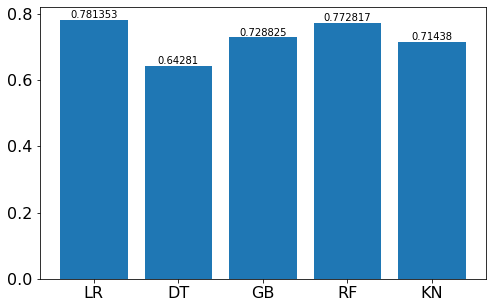

In [28]:
x, y = compare_models['model'],compare_models['accuracy']
ind = np.arange(len(y))
fig, ax = plt.subplots(figsize=(8,5))
ax.bar(ind, y)
ax.set_xticks(ind)
ax.set_xticklabels(x)
ax.bar_label(ax.containers[0], horizontalalignment='left')
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='minor', labelsize=12)
plt.show()
fig.savefig('Comparision of Models, TFIDF.pdf', format='pdf', bbox_inches = "tight")

## BoW

### Vectorizing

In [29]:
train = pd.read_csv("/kaggle/input/nlp-getting-started/train.csv")
test = pd.read_csv("/kaggle/input/nlp-getting-started/test.csv")

In [30]:
train=train.drop(['id','keyword','location'], axis = 1)

In [31]:
dff = train.drop(['target'], axis = 1)

In [32]:
X_temp, X_test, y_temp, y_test = train_test_split(dff, list(train.target), test_size=0.2)

In [33]:
X_test.shape, X_temp.shape, len(y_test), len(y_temp)

((1523, 1), (6090, 1), 1523, 6090)

In [34]:
X_temp['label'] = y_temp

In [35]:
X_temp.head()

,text,label
6837,Hollywood Movie About Trapped Miners Released ...,1
5912,I slammed my phone to the ground and then scre...,0
5298,@SenateMajLdr let's try to do our best to prev...,1
7201,only weapon im scared off is karma,0
686,Bit pacquiao vs marquez 3 unfilled blazing swa...,0


In [36]:
zero = X_temp[X_temp['label'] == 0]
zero.shape[0]

3462

In [37]:
one = X_temp[X_temp['label'] == 1]
one.shape[0]

2628

In [38]:
ds = pd.concat([zero,one], axis = 0)

In [39]:
ds

,text,label
5912,I slammed my phone to the ground and then scre...,0
7201,only weapon im scared off is karma,0
686,Bit pacquiao vs marquez 3 unfilled blazing swa...,0
3394,Evacuation drill at work. The fire doors would...,0
1789,The Next Financial Crash. 'The Writing is on t...,0
...,...,...
1847,'@jorrynja: 6. @ your bf/gf/crush ??' @Ter_ell ??,1
5084,If i tweet daily #Fukushima #Japan global nucl...,1
6072,Water main break disrupts trolley service http...,1
2817,Crews were out all day boarding up windows at ...,1


In [40]:
testdf = X_test
testdf['label'] = y_test
testdf.shape

(1523, 2)

In [41]:
len(testdf[testdf['label']==0]),len(testdf[testdf['label']==1])

(880, 643)

In [42]:
ds = pd.concat([ds, testdf], axis = 0)

In [43]:
ds[ds['label']==0].shape, ds[ds['label']==1].shape

((4342, 2), (3271, 2))

In [44]:
corpus = []
for i in range(ds.shape[0]):
    corpus.append(ds.iloc[i][0])

In [45]:
vectorizer_train = CountVectorizer(max_features=1000)
vocabulary_train = vectorizer_train.fit_transform(corpus)
bow = pd.DataFrame(vocabulary_train.toarray(), columns = vectorizer_train.get_feature_names())

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [46]:
bow['labelxyz'] = list(ds.label)

In [47]:
bow_zero = bow[bow.labelxyz == 0]
bow_one = bow[bow.labelxyz == 1]

X_train_zero = bow_zero.sample(frac=0.8, random_state=0)
X_test_zero = bow_zero.drop(X_train_zero.index)
X_train_one = bow_one.sample(frac=0.8, random_state=0)
X_test_one = bow_one.drop(X_train_one.index)

X_train_df = pd.concat([X_train_zero, X_train_one], axis = 0)
bow_train = X_train_df.drop(['labelxyz'], axis = 1)
y_train = list(X_train_df.labelxyz)
X_test_df = pd.concat([X_test_zero, X_test_one], axis = 0)
bow_test = X_test_df.drop(['labelxyz'], axis = 1)
y_test = list(X_test_df.labelxyz)

## Building ML Model

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
import seaborn as sns

In [49]:
model = ['LR','RF','DT','KN','GB']
accuracy = {'BOW':[]}

### Logistic Regression

In [50]:
#BOW
regressor_LR_bow = LogisticRegression(C= 1.0, penalty='l2', solver= 'liblinear')
regressor_LR_bow.fit(bow_train,y_train)
y_predict_LR_bow = regressor_LR_bow.predict(bow_test)
a=(regressor_LR_bow.score(bow_test,y_test))
accuracy['BOW'].append(a)
print(metrics.confusion_matrix(y_test, y_predict_LR_bow))
print(metrics.classification_report(y_test, y_predict_LR_bow))
print(metrics.accuracy_score(y_test, y_predict_LR_bow))

[[751 117]
 [187 467]]
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       868
           1       0.80      0.71      0.75       654

    accuracy                           0.80      1522
   macro avg       0.80      0.79      0.79      1522
weighted avg       0.80      0.80      0.80      1522

0.8002628120893561


### Random Forest

In [51]:
#BOW
model_RF_bow = RandomForestClassifier(max_features='sqrt', n_estimators= 1000)
model_RF_bow.fit(bow_train,y_train)
y_predict_RF_bow = model_RF_bow.predict(bow_test)
a=(model_RF_bow.score(bow_test,y_test))
accuracy['BOW'].append(a)
print(metrics.confusion_matrix(y_test, y_predict_RF_bow))
print(metrics.classification_report(y_test, y_predict_RF_bow))
print(metrics.accuracy_score(y_test, y_predict_RF_bow))

[[756 112]
 [219 435]]
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       868
           1       0.80      0.67      0.72       654

    accuracy                           0.78      1522
   macro avg       0.79      0.77      0.77      1522
weighted avg       0.78      0.78      0.78      1522

0.7825229960578186


### Decision Tree

In [52]:
model_DT_bow = DecisionTreeClassifier(criterion= 'gini', max_depth= 2) 
model_DT_bow.fit(bow_train,y_train)
y_predict_DT_bow = model_DT_bow.predict(bow_test)
a=(model_DT_bow.score(bow_test,y_test))
accuracy['BOW'].append(a)
print(metrics.confusion_matrix(y_test, y_predict_DT_bow))
print(metrics.classification_report(y_test, y_predict_DT_bow))
print(metrics.accuracy_score(y_test, y_predict_DT_bow))

[[546 322]
 [224 430]]
              precision    recall  f1-score   support

           0       0.71      0.63      0.67       868
           1       0.57      0.66      0.61       654

    accuracy                           0.64      1522
   macro avg       0.64      0.64      0.64      1522
weighted avg       0.65      0.64      0.64      1522

0.6412614980289093


### K neighbors

In [53]:
#BOW
model_KN_bow = KNeighborsClassifier(metric= 'euclidean', n_neighbors= 19, weights= 'distance') 
model_KN_bow.fit(bow_train,y_train)
y_predict_KN_bow = model_KN_bow.predict(bow_test)
a=(model_KN_bow.score(bow_test,y_test))
accuracy['BOW'].append(a)
print(metrics.confusion_matrix(y_test, y_predict_KN_bow))
print(metrics.classification_report(y_test, y_predict_KN_bow))
print(metrics.accuracy_score(y_test, y_predict_KN_bow))

[[835  33]
 [464 190]]
              precision    recall  f1-score   support

           0       0.64      0.96      0.77       868
           1       0.85      0.29      0.43       654

    accuracy                           0.67      1522
   macro avg       0.75      0.63      0.60      1522
weighted avg       0.73      0.67      0.63      1522

0.6734559789750328


### Gradient Boosting

In [54]:
#BOW
model_GB_bow = GradientBoostingClassifier(learning_rate= 0.1, max_depth= 3, n_estimators= 100, subsample= 1.0)
model_GB_bow.fit(bow_train,y_train)
y_predict_GB_bow = model_GB_bow.predict(bow_test)
a=(model_GB_bow.score(bow_test,y_test))
accuracy['BOW'].append(a)
print(metrics.confusion_matrix(y_test, y_predict_GB_bow))
print(metrics.classification_report(y_test, y_predict_GB_bow))
print(metrics.accuracy_score(y_test, y_predict_GB_bow))

[[779  89]
 [276 378]]
              precision    recall  f1-score   support

           0       0.74      0.90      0.81       868
           1       0.81      0.58      0.67       654

    accuracy                           0.76      1522
   macro avg       0.77      0.74      0.74      1522
weighted avg       0.77      0.76      0.75      1522

0.7601839684625493


## Evaluation

In [55]:
data_bow = {'model':model,'accuracy':accuracy['BOW']}
compare_models_bow = pd.DataFrame(data_bow)
compare_models_bow

,model,accuracy
0,LR,0.800263
1,RF,0.782523
2,DT,0.641261
3,KN,0.673456
4,GB,0.760184


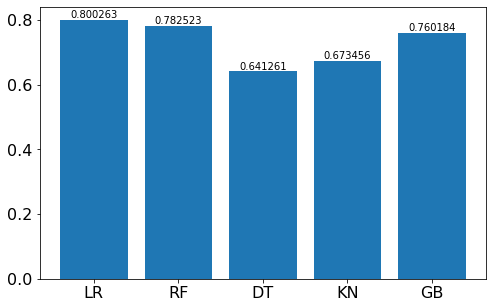

In [56]:
x, y = compare_models_bow['model'],compare_models_bow['accuracy']
ind = np.arange(len(y))
fig, ax = plt.subplots(figsize=(8,5))
ax.bar(ind, y)
ax.set_xticks(ind)
ax.set_xticklabels(x)
ax.bar_label(ax.containers[0], horizontalalignment='left')
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='minor', labelsize=12)
plt.show()
fig.savefig('Comparision of Models, BoW.pdf', format='pdf')

# BERT

In [57]:
import pandas as pd
import csv
import re 
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [58]:
!wget --quiet https://raw.githubusercontent.com/tensorflow/models/master/official/nlp/bert/tokenization.py

In [59]:
!pip install tokenization

In [60]:
import tokenization
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.utils import to_categorical
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [61]:
train = pd.read_csv("/kaggle/input/nlp-getting-started/train.csv")
test = pd.read_csv("/kaggle/input/nlp-getting-started/test.csv")

In [62]:
train

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [63]:
train = train.drop(['id', 'keyword', 'location'], axis = 1)

In [64]:
test = test.drop(['id', 'keyword', 'location'], axis = 1)

In [65]:
train

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...
7608,Two giant cranes holding a bridge collapse int...,1
7609,@aria_ahrary @TheTawniest The out of control w...,1
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,Police investigating after an e-bike collided ...,1


In [66]:
train_data = train

In [67]:
from sklearn.model_selection import train_test_split

# splitting the training and testing part from the data
X_temp, X_test, y_temp, y_test = train_test_split(train_data['text'], train_data['target'], test_size=0.2, random_state=0)

In [68]:
train_X = X_temp
train_y = y_temp
test_x = X_test
test_y = y_test

train_X.shape, train_y.shape, test_x.shape , test_y.shape

((6090,), (6090,), (1523,), (1523,))

In [69]:
!pip install tokenization

In [70]:
label = preprocessing.LabelEncoder()
y = label.fit_transform(train_X)
y = to_categorical(train_y)
print(train_y[:5])

1386    0
4048    1
3086    0
272     0
7462    0
Name: target, dtype: int64


### Build a BERT layer

In [71]:
m_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2'
bert_layer = hub.KerasLayer(m_url, trainable=True)

2023-02-02 18:42:47.243354: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-02 18:42:47.388442: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-02 18:42:47.389297: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-02 18:42:47.391522: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

### Encoding the text¶

In [72]:
!pip install tensorflow==2.0
import tensorflow as tf
print(tf.__version__)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.3/86.3 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 44.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 449.9/449.9 kB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=106394148031d68b63140694d1822fc028630e6cce16789368bc97d77a8c633e
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimator-2.6.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Successfully uninstalled gast-0.4.0
  Atte

In [73]:
import nltk
nltk.download("popular")
from nltk.tokenize import word_tokenize

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk

In [74]:
!pip install bert-for-tf2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 253.0 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Created wheel for bert-for-tf2: filename=bert_for_tf2-0.14.9-py3-none-any.whl size=30535 sha256=0d2fdcfad48d46c8902209a1d50145fca2a9386a460622bb0473ce181789099a
  Stored in directory: /root/.cache/pip/wheels/47/b6/e5/8c76ec779f54bc5c2f1b57d2200bb9c77616da83873e8acb53
  Created wheel for params-flow: filename=params_flow-0.8.2-py3-none-any.whl size=19472 sha256=c44abf3de2649a9dbe4f98751f08cba3b76fef1a9b7ac23c3c9ac316cf9a0406
  Stored in directory: /root/.cache/pip/wheels/0e/fc/d2/a44fff33af0f233d7def6e7de413006d57c10e10ad736fe8f5
  Created wheel for py-params: filename=py_params-0.10.2-py3-none-any.whl size=7911 sha256=dc80caffc750cc5cad984ecb1e355c14c10d539d6e7718ac63b9a564bc723bd5
  Stored in directory: /root/.cache/pip/wheels/e1/11/67/33cc51bbee127cb8fb2ba549cd29109b2f2

In [75]:
from bert import tokenization
from bert.tokenization.bert_tokenization import FullTokenizer

In [76]:
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = FullTokenizer(vocab_file, do_lower_case)

def bert_encode(texts, tokenizer, max_len=512):
    all_tokens = []
    all_masks = []
    all_segments = []
    
    for text in texts:
        text = tokenizer.tokenize(text)
        
        text = text[:max_len-2]
        input_sequence = ["[CLS]"] + text + ["[SEP]"]
        pad_len = max_len-len(input_sequence)
        
        tokens = tokenizer.convert_tokens_to_ids(input_sequence) + [0] * pad_len
        pad_masks = [1] * len(input_sequence) + [0] * pad_len
        segment_ids = [0] * max_len
        
        all_tokens.append(tokens)
        all_masks.append(pad_masks)
        all_segments.append(segment_ids)
        
    return np.array(all_tokens), np.array(all_masks), np.array(all_segments)

### Build the Model

In [77]:
def build_model(bert_layer, max_len=512):
    input_word_ids = tf.keras.Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")
    input_mask = tf.keras.Input(shape=(max_len,), dtype=tf.int32, name="input_mask")
    segment_ids = tf.keras.Input(shape=(max_len,), dtype=tf.int32, name="segment_ids")
    
    pooled_output, sequence_output = bert_layer([input_word_ids, input_mask, segment_ids])
    
    clf_output = sequence_output[:, 0, :]
    
    lay = tf.keras.layers.Dense(64, activation='relu')(clf_output)
    lay = tf.keras.layers.Dropout(0.2)(lay)
    lay = tf.keras.layers.Dense(32, activation='relu')(lay)
    lay = tf.keras.layers.Dropout(0.2)(lay)
    out = tf.keras.layers.Dense(2, activation='softmax')(lay)
    
    model = tf.keras.models.Model(inputs=[input_word_ids, input_mask, segment_ids], outputs=out)
    model.compile(tf.keras.optimizers.Adam(lr=2e-5), loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [78]:
max_len = 250
train_input = bert_encode(train_X.values, tokenizer, max_len=max_len)
test_input = bert_encode(test_x.values, tokenizer, max_len=max_len)
train_labels = train_y

In [79]:
labels = label.classes_
print(labels)

['! Residents Return To Destroyed Homes As Washington Wildfire Burns on http://t.co/UcI8stQUg1'
 '# handbags Genuine Mulberry Antony Cross Body Messenger Bag Dark Oak Soft Buffalo Leather:  å£279.00End Date: W... http://t.co/FTM4RKl8mN'
 "#360WiseNews : China's Stock Market Crash: Are There Gems In The Rubble? http://t.co/9Naw3QOQOL"
 ...
 'å¤} New Ladies Shoulder Tote #Handbag Faux Leather Hobo Purse Cross Body Bag #Womens http://t.co/UooZXauS26 http://t.co/6MGBizjfgd RT en\x89Û_'
 "å¬'Only the sea knows how many are dead' @MSF_Sea after last disaster in #Mediterranean turned into a massgrave  http://t.co/m0utLDif77"
 'åÈMGN-AFRICAå¨ pin:263789F4 åÈ Correction: Tent Collapse Story: Correction: Tent Collapse story åÈ http://t.co/fDJUYvZMrv @wizkidayo']


In [80]:
model = build_model(bert_layer, max_len=max_len)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_word_ids (InputLayer)     [(None, 250)]        0                                            
__________________________________________________________________________________________________
input_mask (InputLayer)         [(None, 250)]        0                                            
__________________________________________________________________________________________________
segment_ids (InputLayer)        [(None, 250)]        0                                            
__________________________________________________________________________________________________
keras_layer (KerasLayer)        [(None, 768), (None, 109482241   input_word_ids[0][0]             
                                                                 input_mask[0][0]             

/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


### Run Model

In [81]:
label = preprocessing.LabelEncoder()
y = label.fit_transform(train_labels)
y = to_categorical(y)
print(y[:5])

[[1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [82]:
checkpoint = tf.keras.callbacks.ModelCheckpoint('model.h5', monitor='val_accuracy', save_best_only=True, verbose=1)
earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, verbose=1)

train_sh = model.fit(
    train_input, y,
    validation_split=0.2,
    epochs=3,
    callbacks=[checkpoint, earlystopping],
    batch_size=32,
    verbose=1
)

Epoch 1/3


2023-02-02 18:43:57.801261: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


153/153 [==============================] - 173s 1s/step - loss: 0.5168 - accuracy: 0.7498 - val_loss: 0.3926 - val_accuracy: 0.8309

Epoch 00001: val_accuracy improved from -inf to 0.83087, saving model to model.h5
Epoch 2/3
153/153 [==============================] - 158s 1s/step - loss: 0.3775 - accuracy: 0.8463 - val_loss: 0.4141 - val_accuracy: 0.8300

Epoch 00002: val_accuracy did not improve from 0.83087
Epoch 3/3
153/153 [==============================] - 158s 1s/step - loss: 0.2929 - accuracy: 0.8916 - val_loss: 0.5318 - val_accuracy: 0.8235

Epoch 00003: val_accuracy did not improve from 0.83087


## Evaluating the Bert Model

In [83]:
prediction = model.predict(test_input)

In [84]:
prediction

array([[0.97583413, 0.02416586],
       [0.9766833 , 0.02331671],
       [0.8576337 , 0.14236629],
       ...,
       [0.9630651 , 0.03693496],
       [0.989646  , 0.01035398],
       [0.2295117 , 0.77048826]], dtype=float32)

In [85]:
prediction.shape

(1523, 2)

In [86]:
pred = np.argmax(prediction, axis = 1)

In [87]:
pred.shape

(1523,)

In [88]:
pred

array([0, 0, 0, ..., 0, 0, 1])

In [89]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y, pred)

0.8437294812869337

In [90]:
test

,text
0,Just happened a terrible car crash
1,"Heard about #earthquake is different cities, s..."
2,"there is a forest fire at spot pond, geese are..."
3,Apocalypse lighting. #Spokane #wildfires
4,Typhoon Soudelor kills 28 in China and Taiwan
...,...
3258,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,Storm in RI worse than last hurricane. My city...
3260,Green Line derailment in Chicago http://t.co/U...
3261,MEG issues Hazardous Weather Outlook (HWO) htt...


In [91]:
#Remove Hashtags
test['text'].replace( { r"#(\w+)" : '' }, inplace= True, regex = True)

#Remove Mention
test['text'].replace( { r"@(\w+)" : '' }, inplace= True, regex = True)

#Remove URL
test['text'].astype(str).replace( { r"http\S+" : '' }, inplace= True, regex = True)

test['text']=train['text'].str.lower()

## Predicting final test labels

In [92]:
test_x = test['text']

In [93]:
test_final = bert_encode(test_x.values, tokenizer, max_len=max_len)

In [94]:
prediction = model.predict(test_final)

In [95]:
pred = np.argmax(prediction, axis = 1)

In [96]:
pred

array([1, 1, 1, ..., 1, 0, 0])

In [97]:
type(pred)

numpy.ndarray

In [98]:
import pandas as pd 
data = pd.read_csv('/kaggle/input/nlp-getting-started/sample_submission.csv', sep=',') 
data.values # print all the contents of the CSV file 

array([[    0,     0],
       [    2,     0],
       [    3,     0],
       ...,
       [10868,     0],
       [10874,     0],
       [10875,     0]])

In [99]:
data

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0
...,...,...
3258,10861,0
3259,10865,0
3260,10868,0
3261,10874,0


In [100]:
df = pd.DataFrame(pred, columns = ['target'])
df

,target
0,1
1,1
2,1
3,1
4,1
...,...
3258,0
3259,0
3260,1
3261,0


In [101]:
data['target']=df['target']

In [102]:
data

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
...,...,...
3258,10861,0
3259,10865,0
3260,10868,1
3261,10874,0


In [103]:
data.to_csv('final_submission.csv', index=False)